In [ ]:
#Importing Libraries
!pip install google-auth

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm
import google.auth
from google.colab import auth

In [ ]:
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''# import the zipfile module
import zipfile

# specify the zip file name and the folder to extract to
zip_file_name = "/content/drive/MyDrive/Data Set/Fashion Data.zip"
extract_folder_name = "/content/drive/MyDrive/Data Set/Fashion Data"

# open the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # extract all files to the specified folder
    zip_ref.extractall(extract_folder_name)'''

In [ ]:
#Extract Filenames from Folder

In [ ]:
filenames = []
for file in os.listdir('/content/drive/MyDrive/Data Set/Fashion Data/images'):
    filenames.append(os.path.join('/content/drive/MyDrive/Data Set/Fashion Data/images',file))


In [ ]:
len(filenames)

44441

In [ ]:
filenames[0]

'/content/drive/MyDrive/Data Set/Fashion Data/images/8826.jpg'

In [ ]:
#Importing ResNet50 Model and Cofiguration

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
#Extracting Fetaures from Image

In [ ]:
img = image.load_img('/content/drive/MyDrive/Data Set/Fashion Data/images/16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 [==============================] - 4s 4s/step


array([0.        , 0.00295305, 0.        , ..., 0.00752506, 0.02113526,
       0.00401741], dtype=float32)

In [ ]:
cv.imshow("Display window", img)

In [ ]:
image_path = '/content/drive/MyDrive/Data Set/Fashion Data/images'

In [ ]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [ ]:
image_features = []
for file in filenames[:]:
    file_path = os.path.join("/content/drive/MyDrive/Data Set/Fashion Data/images", file)
    image_features.append(extract_features_from_images(file_path, model))
image_features

1/1 [==============================] - 0s 33ms/step


KeyboardInterrupt: 

In [ ]:
#extract_features_from_images(filenames[1], model)

In [ ]:
'''image_features = []
for file in filenames[:]:
    image_features.append(extract_features_from_images(file, model))
image_features'''

'image_features = []\nfor file in filenames[:]:\n    image_features.append(extract_features_from_images(file, model))\nimage_features'

In [ ]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [ ]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [ ]:
#Loading Pickle Files

In [ ]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [ ]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [ ]:
np.array(Image_features).shape

(44441, 2048)

In [ ]:
#Finidng Simialar Images

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [ ]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
input_image = extract_features_from_images('/content/drive/MyDrive/Data Set/Fashion Data/images/14880.jpg',model)

1/1 [==============================] - 0s 65ms/step


In [ ]:
print(input_image.shape)

(2048,)


In [ ]:
distance,indices = neighbors.kneighbors([input_image])

In [ ]:
indices[0]

array([ 4082,  4087, 30519, 30517, 38637,  4088])

In [ ]:
from IPython.display import Image

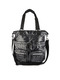

In [ ]:
Image('/content/drive/MyDrive/Data Set/Fashion Data/images/14880.jpg')

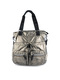

In [ ]:
Image(filenames[indices[0][1]])

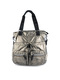

In [ ]:
Image(filenames[indices[0][1]])

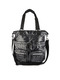

In [ ]:
Image(filenames[indices[0][0]])

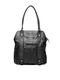

In [ ]:
Image(filenames[indices[0][4]])

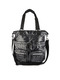

In [ ]:
Image(filenames[indices[0][0]])

In [32]:
import pickle

with open(r'C:\Users\sivac\Documents\MSC ACADAMIC PROJECT\SEM 4\Fashion Recommendation Project\embeddings.pkl', 'rb') as file:
    features = pickle.load(file)
# Inspect the structure of the loaded features
print(type(features))
print(len(features))
print(type(features[0]))
print(len(features[1]))
#X, y = features  # X is your feature matrix, y are the labels or ground truth


<class 'list'>
44441
<class 'numpy.ndarray'>
2048


In [33]:
# Extract based on known positions
X = features[0]
y = features[1]

X = np.array(X)
y = np.array(y)


In [34]:
# Ensure X is a 2D array
if len(X.shape) == 1:
    X = X.reshape(-1, 1)

# Fit the KNN model
knn = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
knn.fit(X)


NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [35]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


# Generate recommendations for the test set
def get_recommendations(item_index, n_recommendations=5):
    distances, indices = knn.kneighbors([X[item_index]], n_neighbors=n_recommendations)
    return indices.flatten(), distances.flatten()

# Example usage
item_index = 0  # Index of the item for which recommendations are needed
recommended_indices, recommended_distances = get_recommendations(item_index)
print(f'Recommended item indices: {recommended_indices}')
print(f'Distances to recommended items: {recommended_distances}')


Recommended item indices: [ 9  1  0 10  3]
Distances to recommended items: [0. 0. 0. 0. 0.]


In [38]:
def precision_at_k(recommended_indices, true_label, k):
    return np.sum(y[recommended_indices[:k]] == true_label) / k

def recall_at_k(recommended_indices, true_label, k):
    return np.sum(y[recommended_indices[:k]] == true_label) / np.sum(y == true_label)

k = 6
precisions = []
recalls = []

for i in range(len(X)):
    true_label = y[i]
    recommended_indices, _ = get_recommendations(i, n_recommendations=k)
    precisions.append(precision_at_k(recommended_indices, true_label, k))
    recalls.append(recall_at_k(recommended_indices, true_label, k))

average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f'Precision@{k}: {average_precision}')
print(f'Recall@{k}: {average_recall}')


Precision@6: 0.18668619791666663
Recall@6: 0.5573272705078125
